In [91]:
# Basic Imports
import numpy as np
import pandas as pd
from numpy.linalg import inv

# Plotting Libraried
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset from skLearn
import sklearn.datasets

# Some Processing Functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline


# 1. Load the Iris dataset from scikit-learn: https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html [MARKS 1]


In [92]:
from sklearn import datasets

dataset = datasets.load_iris()


In [93]:
data = pd.DataFrame(dataset.data,columns = dataset.feature_names)


In [94]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
targets = pd.DataFrame(dataset.target,columns = ['target'])

In [96]:
data.isna().sum()/data.shape[0]

,0
sepal length (cm),0.0
sepal width (cm),0.0
petal length (cm),0.0
petal width (cm),0.0


In [97]:
targets.isna().sum()/targets.shape[0]

,0
target,0.0


In [98]:
# this shows there are no nan values

In [99]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Show the class distribution of the dataset using a bar graph. Is the dataset balanced? [Marks 1]

<Axes: ylabel='Count'>

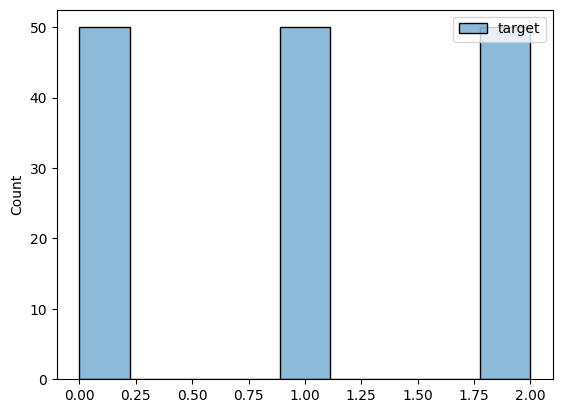

In [100]:
sns.histplot(targets)

In [101]:
for i in range(3):
  print(f'Percentage of fields for class {i} : {(targets == i).sum()/targets.shape[0]*100}')

Percentage of fields for class 0 : target    33.333333
dtype: float64
Percentage of fields for class 1 : target    33.333333
dtype: float64
Percentage of fields for class 2 : target    33.333333
dtype: float64


In [102]:
# as we can see, we have perfectly similar number of examples for each of the classes

# 3. Encode the class labels as one-hot vectors. [Marks 1]

In [103]:
encoder = OneHotEncoder()
targets = encoder.fit_transform(targets).toarray()
targets = pd.DataFrame(targets)

In [104]:
print(targets.head())

     0    1    2
0  1.0  0.0  0.0
1  1.0  0.0  0.0
2  1.0  0.0  0.0
3  1.0  0.0  0.0
4  1.0  0.0  0.0


### 4. Split the data into training, validation, and test sets (70%-15%-15%). [Marks 1]

In [105]:
train_x,temp_x,train_y,temp_y = train_test_split(data,targets,test_size = 0.3,random_state = 42)
test_x,val_x,test_y,val_y = train_test_split(temp_x,temp_y,test_size = 0.5,random_state = 42)

### 5. Preprocess the dataset as required, i.e. feature scaling or standardization [Marks 1]





In [106]:
mean = train_x.mean()
std = train_x.std()
train_x = (train_x - mean)/std
val_x = (val_x - mean)/std
test_x = (test_x - mean)/std

In [107]:
train_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,-0.411443,-1.455024,-0.099036,-0.321854
133,0.548591,-0.500165,0.714277,0.351347
137,0.668595,0.215980,0.946652,0.755267
75,0.908603,-0.022735,0.307620,0.216707
109,1.628629,1.409555,1.295215,1.697748


### 6. Implement a softmax (multinomial) logistic regression model from scratch. [Marks 1]

In [108]:
def softmax(x):
    return np.exp(x-x.max())/ np.sum(np.exp(x-x.max()), axis=0)


In [109]:
class Logistic_Regression():
  def __init__(self, learning_rate=0.01, iterations=500):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.mse_history_train = []
        self.mse_history_val = []

  def fit(self, X_train, y_train, X_val, y_val):
        m, n = X_train.shape
        n = 4
        self.theta = np.zeros((n, 3))
        self.bce_loss_train = []
        self.bce_loss_val = []

        for i in range(1,self.iterations+1):
          z = np.dot(X_train, self.theta)

          outputs = softmax(z.T).T
          loss = -np.mean(y_train * np.log(outputs))
          self.bce_loss_train.append(loss)
          grad_theta = np.dot(X_train.T, (outputs - y_train)) / m
          self.theta = self.theta - self.learning_rate * grad_theta


          #val loss
          z = np.dot(X_val, self.theta)
          outputs = softmax(z.T).T
          loss = -np.mean(y_val * np.log(outputs))
          self.bce_loss_val.append(loss)

          #showing losses
          if i%10 ==0 :
            print(f"after {i}th iteration --> train_loss : {self.bce_loss_train[-1]} ::: val_loss : {self.bce_loss_val[-1]}")

  def predict(self, X):
        z = np.dot(X, self.theta)
        outputs = softmax(z.T).T
        return np.argmax(outputs, axis=1)
  def calculate_loss(self, X, y):
        z = np.dot(X, self.theta)
        outputs = softmax(z.T).T
        loss = -np.mean(y * np.log(outputs))
        return loss

In [110]:
# lets train a model and see
model = Logistic_Regression()
model.fit(train_x,train_y,val_x,val_y)

after 10th iteration --> train_loss : 0.3412786412497695 ::: val_loss : 0.3404025903280539
after 20th iteration --> train_loss : 0.31787270896709235 ::: val_loss : 0.3190014990857511
after 30th iteration --> train_loss : 0.2982368791314363 ::: val_loss : 0.3012577737618546
after 40th iteration --> train_loss : 0.28169367960842256 ::: val_loss : 0.2865126151193901
after 50th iteration --> train_loss : 0.26767245521422756 ::: val_loss : 0.27420672570825194
after 60th iteration --> train_loss : 0.2557051551448561 ::: val_loss : 0.2638789964213919
after 70th iteration --> train_loss : 0.24541402111130659 ::: val_loss : 0.2551562677504212
after 80th iteration --> train_loss : 0.2364967420007181 ::: val_loss : 0.2477397330846542
after 90th iteration --> train_loss : 0.22871211982456127 ::: val_loss : 0.24139126176691952
after 100th iteration --> train_loss : 0.22186757464429746 ::: val_loss : 0.23592120331591712
after 110th iteration --> train_loss : 0.2158088402557187 ::: val_loss : 0.23117

In [111]:
# test error
model.calculate_loss(test_x,test_y)

np.float64(0.08855851864519512)

### 7. Using cross entropy as loss and apply L2 regularization weights in the cost function and train the softmax logistic regression model with gradient descent.
- Use cross validation to find a suitable value of the learning rate and regularization parameter.
- Also give the training and validation loss vs. training epochs plot. [Marks 6]

In [112]:
# we use a similar function as above, just with a l2 regularization loss
class LogisticRegression_with_regularization():
  def __init__(self, learning_rate=0.01, iterations=1000, lamda = 0.01,show_loss = True ):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.b = None
        self.mse_history_train = []
        self.mse_history_val = []
        self.lamda = lamda
        self.epsilon = 1e-15 # Added epsilon for numerical stability
        self.show_loss = show_loss

  def fit(self, X_train, y_train, X_val, y_val):
        m, n = X_train.shape
        n = 4
        self.theta = np.zeros((n, 3))
        self.b = np.zeros((1,3))
        self.bce_loss_train = []
        self.bce_loss_val = []

        for i in range(1,self.iterations+1):
            z = np.dot(X_train, self.theta) + self.b
            outputs = softmax(z.T).T + self.epsilon # Added epsilon here
            loss = -np.mean(y_train * np.log(outputs)) + 0.5 * self.lamda * np.sum(np.square(self.theta))
            self.bce_loss_train.append(loss)

            grad_theta = np.dot(X_train.T, (outputs - self.epsilon - y_train)) / m + self.lamda * self.theta # Adjusted gradient calculation
            grad_b = np.sum((outputs - self.epsilon - y_train), axis=0)/m # Adjusted gradient calculation
            self.theta = self.theta - self.learning_rate * grad_theta
            self.b = self.b - self.learning_rate * np.array(grad_b).reshape(1,3)

            #val loss
            z = np.dot(X_val, self.theta) + self.b
            outputs = softmax(z.T).T + self.epsilon # Added epsilon here
            loss = -np.mean(y_val * np.log(outputs)) + 0.5 * self.lamda * np.sum(np.square(self.theta))
            self.bce_loss_val.append(loss)

            #showing losses
            if(i%20==0) and self.show_loss :
              print(f"after {i}th iteration --> train_loss : {self.bce_loss_train[-1]} ::: val_loss : {self.bce_loss_val[-1]}")

  def predict(self, X):
        z = np.dot(X, self.theta) + self.b
        outputs = softmax(z.T).T
        return np.argmax(outputs, axis=1)
  def calc_loss(self, X, y):
        z = np.dot(X, self.theta) + self.b
        outputs = softmax(z.T).T + self.epsilon # Added epsilon here
        loss = -np.mean(y * np.log(outputs))
        return loss

In [113]:
# lets predict and see
model2 = LogisticRegression_with_regularization()
model2.fit(train_x,train_y,val_x,val_y)


after 20th iteration --> train_loss : 0.31790232565408866 ::: val_loss : 0.31891809793619413
after 40th iteration --> train_loss : 0.28194500839256353 ::: val_loss : 0.28650806038860765
after 60th iteration --> train_loss : 0.2562188338579862 ::: val_loss : 0.2639272834074476
after 80th iteration --> train_loss : 0.2372501196402323 ::: val_loss : 0.24774612356313394
after 100th iteration --> train_loss : 0.2228178997413781 ::: val_loss : 0.23577546844994274
after 120th iteration --> train_loss : 0.2115144240503036 ::: val_loss : 0.2266391321009051
after 140th iteration --> train_loss : 0.20243441325904474 ::: val_loss : 0.2194636165754949
after 160th iteration --> train_loss : 0.19498129454437393 ::: val_loss : 0.21368278699230203
after 180th iteration --> train_loss : 0.1887508869761832 ::: val_loss : 0.2089204225280703
after 200th iteration --> train_loss : 0.1834616696206535 ::: val_loss : 0.20492000808350458
after 220th iteration --> train_loss : 0.17891235199765693 ::: val_loss : 

In [114]:
best_learning_rate = -1
best_loss = 1e6
best_lamda = -1
for learning_rate in np.logspace(-5,0,6):
  for lamda in np.logspace(-5,0,6):
    model2 = LogisticRegression_with_regularization(learning_rate = learning_rate,lamda = lamda,show_loss = False)
    model2.fit(train_x,train_y,val_x,val_y)
    loss = model2.calc_loss(val_x,val_y)
    if loss < best_loss:
      best_loss = loss
      best_learning_rate = learning_rate
      best_lamda = lamda
print(f"best_learning_rate : {best_learning_rate} ::: best_lamda : {best_lamda} ::: best_loss : {best_loss}")


best_learning_rate : 1.0 ::: best_lamda : 1e-05 ::: best_loss : 0.015311994353669226


In [115]:
model2 = LogisticRegression_with_regularization(learning_rate = best_learning_rate,lamda = best_lamda)
model2.fit(train_x,train_y,val_x,val_y)

after 20th iteration --> train_loss : 0.08909869026230287 ::: val_loss : 0.10705554467886741
after 40th iteration --> train_loss : 0.06723442982232587 ::: val_loss : 0.07355089815716283
after 60th iteration --> train_loss : 0.05596073166522757 ::: val_loss : 0.05635076131435737
after 80th iteration --> train_loss : 0.04906251038517941 ::: val_loss : 0.04626869201459484
after 100th iteration --> train_loss : 0.04439867985344551 ::: val_loss : 0.039745335534604215
after 120th iteration --> train_loss : 0.041027616884312945 ::: val_loss : 0.03520689599899414
after 140th iteration --> train_loss : 0.03847140866132254 ::: val_loss : 0.031871693934892614
after 160th iteration --> train_loss : 0.03646215352082737 ::: val_loss : 0.029314610957202166
after 180th iteration --> train_loss : 0.034838156308194736 ::: val_loss : 0.027287273288953758
after 200th iteration --> train_loss : 0.03349606156155036 ::: val_loss : 0.02563592921215928
after 220th iteration --> train_loss : 0.03236670228988112

In [116]:
# test loss
model2.calc_loss(test_x,test_y)

np.float64(0.00933206155319035)

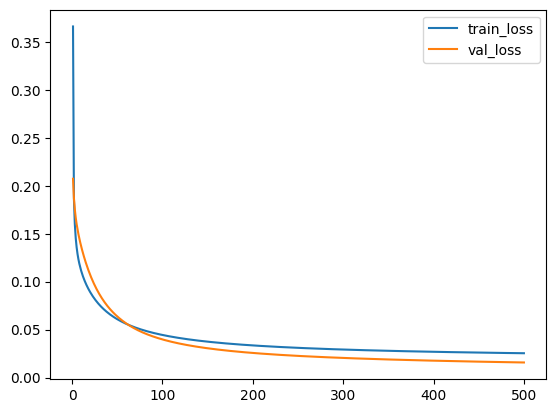

In [117]:
sns.lineplot(x = np.arange(1,model2.iterations+1),y = model2.bce_loss_train,label = 'train_loss')
sns.lineplot(x = np.arange(1,model2.iterations+1),y = model2.bce_loss_val,label = 'val_loss')
plt.legend()
plt.show()

In [118]:
# val loss is a higher as we can see

### 8. Report the prediction performance of your implementation on the test set in terms of confusion matrix, precision, recall and area under precision recall curve. [Marks 2]

In [119]:
#test set confusion matrix
preds = model2.predict(test_x)
test_y_np = np.argmax(test_y.to_numpy(),axis = 1)


In [120]:
confusion_matrix = pd.crosstab(test_y_np, preds, rownames=['Actual'], colnames=['Predicted'])
print(f"confusion_matrix  : {confusion_matrix}")


confusion_matrix  : Predicted   0  1  2
Actual             
0          13  0  0
1           0  3  0
2           0  0  6


In [121]:
from sklearn.metrics import recall_score, precision_score


In [122]:
#area under precision recall curve
# for all categories
from sklearn.metrics import precision_recall_curve,auc
y_one_hot_encoded = pd.get_dummies(test_y)
y_one_hot_encoded = y_one_hot_encoded.to_numpy()
n_classes = y_one_hot_encoded.shape[1]
our_recall = []
our_precision = []
our_auc = []
for classs in range(n_classes):
  precision, recall, thresholds = precision_recall_curve(y_one_hot_encoded[:, classs], preds == classs)
  our_recall.append(recall)
  our_precision.append(precision)
  Auc = auc(recall, precision)
  our_auc.append(Auc)
  print(f"class {classs} ::: auc : {Auc}")

class 0 ::: auc : 1.0
class 1 ::: auc : 1.0
class 2 ::: auc : 1.0


### 9. Fit a logistic regression model using scikit-learn's Logistic Regression model https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Use multi-class=’multinomial’ and penalty =’l2’ and the parameter C to be equal to the inverse of the regularization parameter that you found through cross validation. [Marks 4]

In [123]:
from sklearn.linear_model import LogisticRegression
train_y_np = np.argmax(train_y.to_numpy(),axis = 1)
model3 = LogisticRegression(multi_class='multinomial',penalty = 'l2',C = 1/best_lamda)
model3.fit(train_x,train_y_np)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(99999.99999999999), multi_class='multinomial')

In [124]:
preds = model3.predict(test_x)
library_precision = []
library_recall = []
library_auc = []
for classs in range(n_classes):
  precision, recall, thresholds = precision_recall_curve(y_one_hot_encoded[:, classs], preds == classs)
  library_precision.append(precision)
  library_recall.append(recall)
  Auc = auc(recall, precision)
  library_auc.append(Auc)
  print(f"class {classs} ::: auc : {Auc}")

class 0 ::: auc : 1.0
class 1 ::: auc : 1.0
class 2 ::: auc : 1.0


### 10. Compare the performance of your custom logistic regression model with scikit learn in terms of accuracy, precision, recall and area under precision-recall curve. [Marks 2]

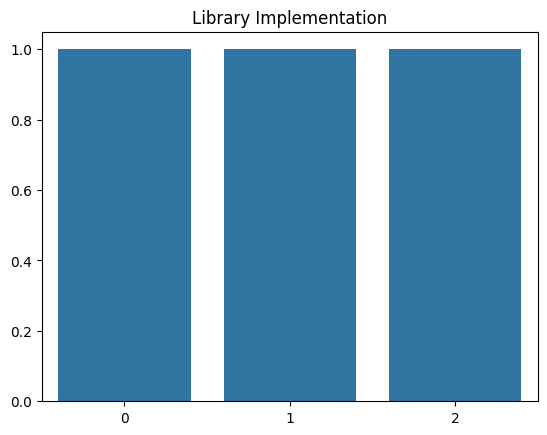

In [125]:
# comparing performance of our model vs scikit learn's implementation
sns.barplot(library_auc)
plt.title('Library Implementation')
plt.show()


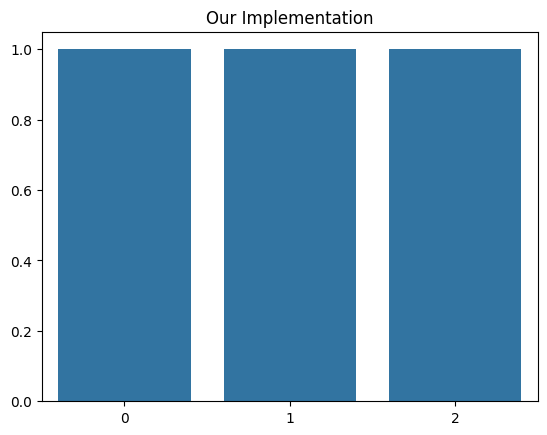

In [126]:
sns.barplot(our_auc)
plt.title('Our Implementation')
plt.show()

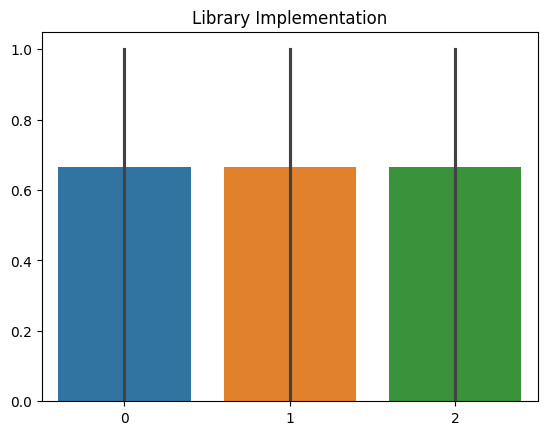

In [127]:
sns.barplot(library_recall)
plt.title('Library Implementation')
plt.show()


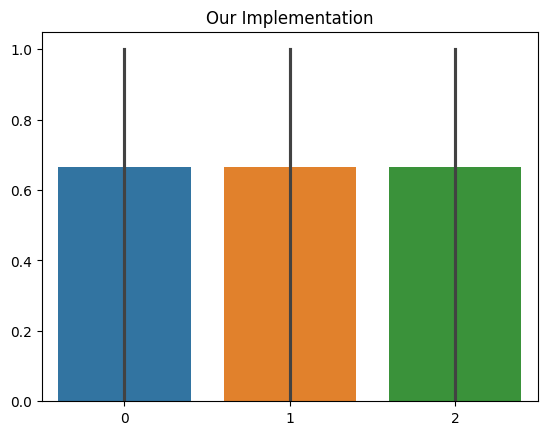

In [128]:
sns.barplot(our_recall)
plt.title('Our Implementation')
plt.show()

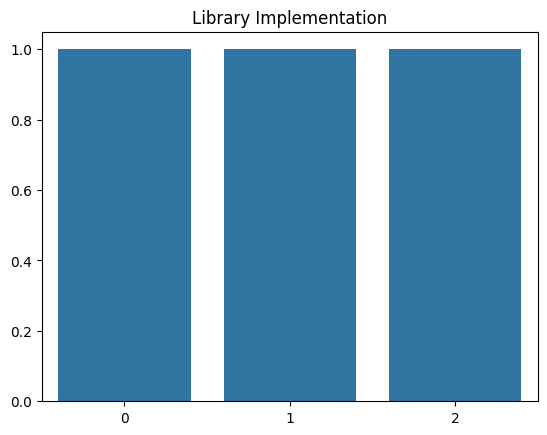

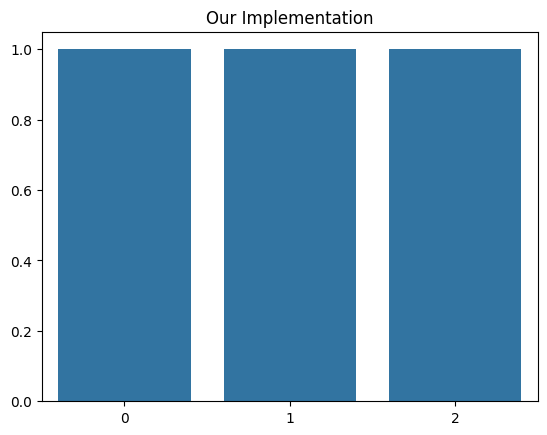

In [129]:
#auc comparision for both
sns.barplot(library_auc)
plt.title('Library Implementation')
plt.show()
sns.barplot(our_auc)
plt.title('Our Implementation')
plt.show()

###From the above assignment we can conclude that our model and scikit learns complicated implementation perform almost similarly. The factors that might be leading to such a behaviour are:
*   We found the nearly best possible hyperparameters.
*   We were able to reach the minima of loss function.
*   The data is very simple and our models overfit easily giving us the best possible score on all metrics.
*   Our model gives the best possible results with the least possible lambda value, which means our model is trying to reduce the regualization as much as possible, which again points to the fact that the data is so simple that our model is trying to overfit to it.
*   val and test also come from the same data sets, which also contributes to the amazing metric scores we are getting.


